<h1 align = "center">"Predicting Airbnb room price in New York City for 2019"</h1>





<h2 align = "center">Department of Information Engineering and Mathematics</h2>
<h3 align = "center">M.Sc. in Engineering Management, University of Siena</h3>

<DIV align = "center">Programming for Data Science course - project work</DIV>

<DIV align = "right">Matteo Vadi</DIV>
<DIV align = "right">University ID: 092663</DIV>
<DIV align = "right">matteo.vadi@student.unisi.it</DIV>
<DIV align = "right">Siena - 13<sup>th</sup> of January, 2021</DIV>

---

# 1. Introduction: Problem identification

All of us have to look for a place to stay for a longer or shorter time period, at least once in our lives. Airbnb platform could help in these situations. **Airbnb, Inc.** is an American vacation rental online marketplace company based in San Francisco, California US. It allows to host and rent different properties, accessible to consumers on its website or via an App. Through the service, users can arrange lodging, primarily homestays, and tourism experiences or list their properties for rental.
This works deal with `Machine Learning` algorithms applied to a dataset concerning **rental properties** on Airbnb platform in **New York City** for **2019**.

This project aims to **predict** the **room price** for each of the 3 different types of rental properties you can find in the original dataset (“Entire home / apartment”, “Private room” and “Shared room”), depending on the **most informative features**, accurately selected, comparing different Machine Learning models. To go in-depth, since there is a target variable which is continuous, I decided to analyse different `regression models` and comparing them using specific accuracy and performances measures. The regression models explored in this work are:
<ul>
  <li><b>Multiple Linear Regression</b></li>
  <li><b>Ridge Regression</b></li>
  <li><b>Elastic-nets Regression</b></li>
  <li><b>Lasso Regression</b></li>
</ul>

In doing the project work, we will also try to determine which are **hosts** are the **busiest** and why.


First, we will import useful `Python libraries` for the aim of the project.

In [1]:
#### Importing some libraries ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
print('Libraries imported.')

Libraries imported.


---

# 2.   Dataset

The original dataset describes the listing activity and metrics in NYC for 2019. You can find it to the [Kaggle website](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) but in the first place, it is part of [Airbnb's open data](http://insideairbnb.com).
The data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

In [2]:
# Importing the dataset stored in the same folder of this notebook
airbnb = pd.read_csv('airbnb.csv')

In [3]:
# Visualizing head and tail of the original dataset and printing the number of rows and columns (airbnb.shape --> tuple)
print('The airbnb dataframe shows {} records (rows) and {} attributes (columns)'.format(airbnb.shape[0], airbnb.shape[1]))
airbnb

The airbnb dataframe shows 48895 records (rows) and 16 attributes (columns)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Below, the list of all the **16 attributes** you can find in the original dataset:
- **`id`**: an integer number indicating a specific listing;
- **`name`**: the name of the listing;
- **`host_id`**: an integer number indicating a specific host;
- **`host_name`**: the name of the host;
- **`neighbourhood_group`**: the NYC's borough the listing belongs to;
- **`neighbourhood`**: the NYC's neighbourhood the listing belongs to;
- **`latitude`**: the latitude geo-coordinate for the listing;
- **`longitude`**: the longitude geo-coordinate for the listing;
- **`room_type`**: one of the three listing space types;
- **`price`**: the price in dollars; 
- **`minimum_nights`**: the minimum number of nights you can rent the property;
- **`number_of_reviews`**: the number of reviews the rental property got in the platform;
- **`last_review`**: the date of the last review the rental property got in the platform;
- **`reviews_per_month`**: the number of review per month the rental property got in the platform;
- **`calculated_host_listings_count`**: the amount of listings an host has submitted in the platform;
- **`availability_365`**: number of days in an year when listing is available for booking.

In [4]:
# Understanding data types
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Not all the features will be used in doing such a project work. We will take care about the useless features in the **Model development** section.

The following section aims to understand in-depth each attributes which belongs to the orignal dataset, in terms of ***unique***, ***duplicates*** and ***missing values***.

## 2.1 - Understanding features

The following analysis has been realized in order to extract some useful information for understanding the dataset. In particular, I focused on **unique values** for features in which counting the distinct values makes sense (i.e. it's reasonable to have the same values repeated), thus for **room_type**, **neighbourhood_group** and **neighbourhood**.

In [5]:
# Checking the different rental properties in the dataset
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

The output above shows that there are **3 different rental properties** in the original dataset. They are:
- **Entire home/apartment**
- **Private room**
- **Shared room** 

The most populated ones are **Entire home/apartment** and **Private room**.

In [6]:
# Checking the different boroughs in the dataset
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Exploring the dataset, we can se that there are **5 different boroughs** in the orignal dataset. They are:
- **Bronx**
- **Brooklyn**
- **Manhattan** 
- **Queens**
- **Staten Island** 

The most populated ones are **Brooklyn** and **Manhattan**, while the less populated is **Staten Island**.

In [7]:
# Checking the different neighbourhoods in the dataset
airbnb['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Willowbrook              1
New Dorp                 1
Richmondtown             1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64

In [8]:
# Checking the less populated neighbourhoods in the dataset (with only 1 or 2 listings)
airbnb['neighbourhood'].value_counts()[airbnb['neighbourhood'].value_counts().isin([1,2])]

West Farms                    2
Lighthouse Hill               2
Bay Terrace, Staten Island    2
Co-op City                    2
Silver Lake                   2
Howland Hook                  2
Westerleigh                   2
Rossville                     1
Fort Wadsworth                1
Willowbrook                   1
New Dorp                      1
Richmondtown                  1
Woodrow                       1
Name: neighbourhood, dtype: int64

For what concerns neighbourhoods, we can se that there are **221 different values** in the orignal dataset. The most populated ones are **Williamsburg** and **Bedford-Stuyvesant**. 

The less populated neighbourhoods instead, presenting only 1 listing, are:
- **Fort Wadsworth**
- **New Dorp**
- **Richmondtown**
- **Rossville**
- **Willowbrook**
- **Woodrow**

The ones presenting 2 listings are:
- **Bay Terrace, Staten Island**
- **Co-op City**
- **Howland Hook**
- **Lighthouse Hill**
- **Silver Lake**
- **West Farms**
- **Westerleigh**

We will take in consideration these aspects for the 3 attributes just analyzed in the following operations.

## 2.2 - Data cleaning and preparation

This part aims to deal with **missing** and **duplicates values**, in order to prepare the dataset to be explored and then processed. Let's start with NA values.

In [9]:
# Checking missing values in the dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

So, let's explore in a deeper way the attributes involving missing values. Those are:
- **name**
- **host_name**
- **last_review**
- **reviews_per_month**

From now on, the goal will be to understand how these missing values are spread among distinct values previously found (for **room_type**, **neighbourhood_group** and **neighbourhood**), just to be sure that an eventual drop would not change the underline distribution of the values for each specific feature, avoiding the so called **Selection Bias**. Let's start considering only **host_name** feature.

In [10]:
# Missing values for name and host_name grouped by rental properties (which room_type shows more NA values with respect to name and host_name attributes)
print('\nMissing values for host_name, grouped by rental properties:\n')
print(airbnb[airbnb["host_name"].isna()==True].groupby("room_type")["id"].count())


Missing values for host_name, grouped by rental properties:

room_type
Entire home/apt     9
Private room       12
Name: id, dtype: int64


In [11]:
# Missing values for name and host_name grouped by NYC's boroughs (which borough shows more NA values with respect to name and host_name attributes)
print('\nMissing values for host_name, grouped by boroughs:\n')
print(airbnb[airbnb["host_name"].isna()==True].groupby("neighbourhood_group")["id"].count())


Missing values for host_name, grouped by boroughs:

neighbourhood_group
Bronx        1
Brooklyn     9
Manhattan    9
Queens       2
Name: id, dtype: int64


In [12]:
# Missing values for name and host_name grouped by neighbourhoods (which neighbourhood shows more NA values with respect to name and host_name attributes)
print('\nMissing values for host_name, grouped by neighbourhoods:\n')
print(airbnb[airbnb["host_name"].isna()==True].groupby("neighbourhood")["id"].count())


Missing values for host_name, grouped by neighbourhoods:

neighbourhood
Bushwick            1
Chelsea             1
Crown Heights       1
Ditmars Steinway    1
East Flatbush       2
East Harlem         1
Flatbush            2
Greenpoint          2
Harlem              2
Hell's Kitchen      3
Highbridge          1
Queens Village      1
Upper East Side     1
Upper West Side     1
Williamsburg        1
Name: id, dtype: int64


The ***host_name*** feature involves very few missing values, with respect to the entire dataset's shape (only **21** compared to the **48895** records in the original dataset); moreover, they mainly refer to the most populated rental properties (**Entire home/apartment** and **Private room**) and boroughs (**Brooklyn** and **Manhattan**). 

The only problem could be connected to the **neighbourhood** attribute, since some neighbourhoods (the ones with only 1, 2 or 3 listings) would have been completely removed from the dataset in case of dropping NA values; fortunately, missing values connected to this attribute refer to highly populated neighbourhoods. In particular, they refer to neighbourhoods with more than 60 listings each (if you want to check over, just run `airbnb.groupby('neighbourhood').count().loc['**name_of_the_neighbourhood**']` using the name of the neighbourhood you want to manage, among those presenting missing values in **host_name** atribute), except for **Highbridge** (there you can find 27 listings, with one of them which shows a missing value).

Hence, we can easily **drop** all **NA values** for this feature, being sure to not change the underline distributions of the data.

Important Note: we will drop the entire row in such situations.

In [13]:
# Dropping missing values connected to name and host_name
airbnb.dropna(axis=0,subset=["host_name"],inplace=True)

Let's check again missing values in the dataset

In [14]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10047
reviews_per_month                 10047
calculated_host_listings_count        0
availability_365                      0
dtype: int64

For what concerns *last_review* and *review_per_month* instead, I had to make different considerations, since their a-priori removal could bring to changes in the distribution of the data if we decide to drop all the rows connected to `NA values` there. A possible approach could be to fill in missing values in **last_review** (`object` data type) with `"NOreview"` and in **review_per_month** (`integer` data type) with `0`; actually, this seems to be the best approach, since in each row there is a NA value for *last_review* there is also a NA value *review_per_month* (hence these listing have not been ever reviewed yet; check this fact with `airbnb[(airbnb['last_review'].isna()) | (airbnb['reviews_per_month'].isna())]`).

In [15]:
# Filling in missing values for last_review and review_per_month
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.fillna({'last_review':"NOreview"}, inplace=True)
#airbnb.dropna(subset=['reviews_per_month','last_review'], axis=0, inplace = True)

Let's check missing values in the dataset for the last time.

In [16]:
airbnb.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

For what concerns **name** attribute, these NA values are not important since we will drop the entire column in the **Model development** phase. **name** atribute becomes important in exploring **duplicates** instead. In fact, I focused on **id** and on **name** attributes; each *id* must be unique, so that the *name* of each listing (in principle, at least). Let's see if there are some duplicated values connected to these features.

In [17]:
# Looking for duplicates for id feature
print('The number of unique values for the id attribute is:', airbnb["id"].unique().shape[0])
print("\nThe number of dataset's records after removing NA values is:", airbnb.shape[0])
if airbnb["id"].unique().shape[0]==airbnb.shape[0]:
    print('\nHence, for the id attribute there are no dupicates values.')
else:
    print("\nHence, for the id attribute there are some duplicates values. So let's explore them in the cell below.")

The number of unique values for the id attribute is: 48874

The number of dataset's records after removing NA values is: 48874

Hence, for the id attribute there are no dupicates values.


In [18]:
# Looking for duplicates for name feature
print('The number of unique values for the name attribute is:', airbnb["name"].unique().shape[0])
print("\nThe number of dataset's records after removing NA values is:", airbnb.shape[0])
if airbnb["name"].unique().shape[0]==airbnb.shape[0]:
    print('\nHence, for the name attribute there are no dupicates values.')
else:
    print("\nHence, for the name attribute there are some duplicates values. So let's explore them in the cell below.")

The number of unique values for the name attribute is: 47885

The number of dataset's records after removing NA values is: 48874

Hence, for the name attribute there are some duplicates values. So let's explore them in the cell below.


In [19]:
# Checking duplicates for name feature
duplicates = pd.DataFrame(airbnb['name'].value_counts()[airbnb['name'].value_counts()>1]) # storing duplicates in a new Phyton object
print('\nThere are {} duplicates for the name attribute.\n'.format(duplicates.shape[0]))
print('The values (head and tail) which occur in the dataset more than once for the name attribute are:\n')
duplicates


There are 645 duplicates for the name attribute.

The values (head and tail) which occur in the dataset more than once for the name attribute are:



,name
Hillside Hotel,18
Home away from home,17
New york Multi-unit building,16
Brooklyn Apartment,12
Loft Suite @ The Box House Hotel,11
...,...
Studio Apartment in Upper East Side,2
Sunny Private BR in Ridgewood Woodbine,2
Bright Room in Bushwick,2
Brooklyn State of Mind - The Artist Loft,2


Let's explore a random **private room** among the previous ones.

In [20]:
# Exploring a random private room duplicated values in the name attribute
airbnb[airbnb["name"]=="Loft w/ Terrace @ Box House Hotel"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
328,80700,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73738,-73.95482,Private room,349,3,7,2019-05-24,0.07,28,60
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
680,253839,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73783,-73.95259,Private room,249,3,3,2015-11-03,0.03,28,60


We can see that the name for these private rooms is the same. Actually, checking on the Airbnb webiste (check [here](https://fr.airbnb.be/rooms/80700/?source_impression_id=p3_1610196444_UA%2B%2Bfg8WIjX3QsOP) and [here](https://www.airbnb.it/rooms/253839?source_impression_id=p3_1610196381_uyKEPEsQ2uK8ZMs%2B), for instance), is possible to observe that, even if the name is the same, they are different rooms from the same host (confirmed by the fact that, sometimes, the price is different or anyway there are no entire duplicated records; you can check the latter aspect running `airbnb.duplicated().sum()`). The same anaylis can be extended to **Shared rooms** and **Entire home/apt**. Hence, **removing duplicates connected to the name attribute does not make sense**.

## 2.3 - The busiest hosts

Before moving on, let's see **what are the busiest host and why**. I will start in trying to determine the busiest among all. So let's get started with the *most reviewed per month*.

In [21]:
# Getting the most reviewed_per_month hosts
top5_rev=airbnb.groupby('host_id').sum()['reviews_per_month'].sort_values(ascending=False).head()
top5_rev

host_id
219517861    397.56
244361589    111.72
232251881     80.63
26432133      68.02
137274917     62.89
Name: reviews_per_month, dtype: float64

We can get also the hosts which have the *higher number of listings*:

In [22]:
# Count number of time unique value for host_id occurs
top5_list=airbnb['host_id'].value_counts().head() 
top5_list

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64

We can observe that the highest value is got by the same *host_id* in both cases. Hence, we can definitely say that:

In [23]:
busiest_host = airbnb[airbnb['host_id']==219517861]['host_name'].unique()
print('The busiest host among all is:', busiest_host[0])

The busiest host among all is: Sonder (NYC)


What about exctracting useful information about the spread of the busiest hosts, depending on the **number_of_reviews**? In this way, we can group data according to the borough each listing belongs to and then take a look at the number of reviews (according to the median value) for each borough. We can assume that the borough presenting the higher number of reviews is also the most visited one.

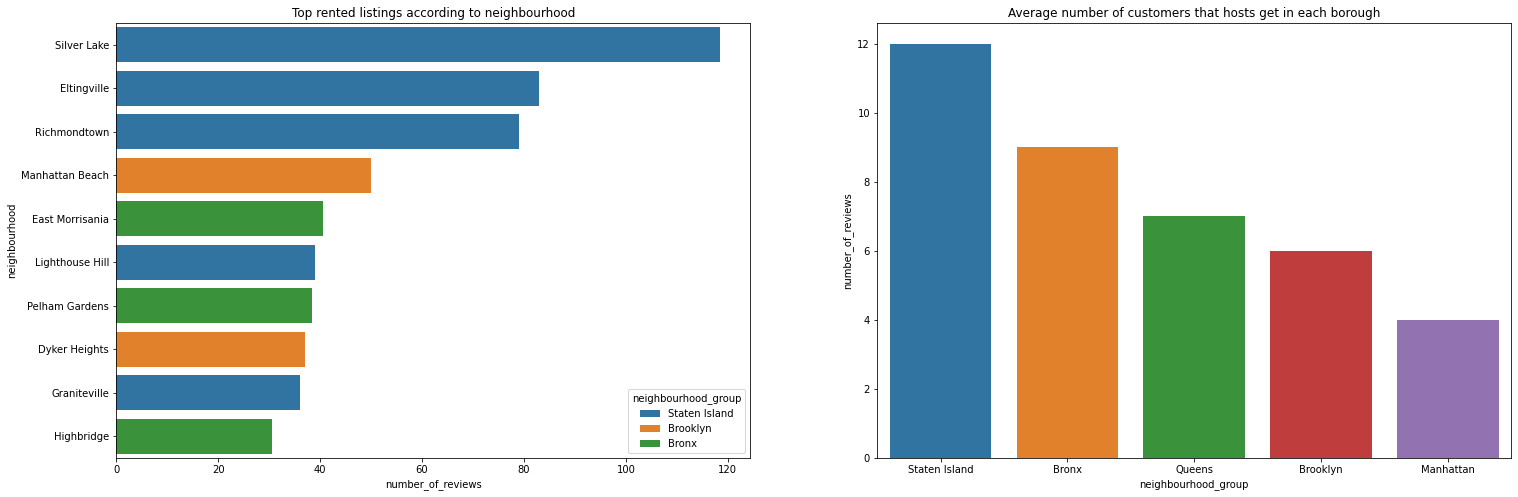

In [24]:
# Since number_of_reviews have many outliers, I should use median instead of mean as the measure of central tendency (more robust)

# First, dataframe grouping data by boroughs and applying the median function; sorting them according to the number of reviews and resetting indeces
top_listings = airbnb.groupby('neighbourhood_group').median().sort_values(by = 'number_of_reviews', ascending = False).reset_index()
# Second, dataframe grouping data by boroughs and neighbourhoods, applying the median function; sorting them according to the number of reviews and resetting indeces
top10_listings = airbnb.groupby(['neighbourhood_group', 'neighbourhood']).median().sort_values(by = 'number_of_reviews', ascending = False).reset_index().head(10)
# plotting results 
fig, axis = plt.subplots(1, 2, figsize = (25, 8))
sns.barplot(x = 'number_of_reviews', 
            y = 'neighbourhood', 
            data = top10_listings, 
            orient = 'h', 
            ci = False, 
            hue = 'neighbourhood_group', 
            dodge = False, 
            ax = axis[0], 
            estimator = np.median).set(title = 'Top rented listings according to neighbourhood')
sns.barplot(x = 'neighbourhood_group', 
            y = 'number_of_reviews', 
            data = top_listings, 
            ci = False, 
            dodge = False, 
            ax = axis[1]).set(title = 'Average number of customers that hosts get in each borough')
plt.show()

From the observations above, we can conclude that hosts in **Staten Island** are the busiest, in terms of getting customers. In particular, **Silver Lake, Eltingville and Richmondtown** seems to be the top 3 hotspots for hosts to get the higher number of clients.
Although Manhattan and Brooklyn have the most listings & customers, Staten Island has the busiest hosts; this is probably due to less competition, very low costs compared to other boroughs (you can check it later, in the **Exploratory Data Analysis**) and less minimum night requirements which drives there more customers.

---

# 3. Exploratory Data Analysis

In this section, we will manage an **Exploratory Data Analysis**, using **statistics** measures and **graphical representations**.

## 3.1 - Useful summary statistics for target variable

We will start from the **target** variable which is the **price**.

In [25]:
# Summary statistics for price target attribute
airbnb["price"].describe()

count    48874.000000
mean       152.738634
std        240.199728
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

We can observe that the **average price** is approximately **153 $**, while the **minimum** is **0** and the **maximum** is **10.000**.

Let's see the distribution of price.

The 3rd order moment for the distribution (Skewness Index) for the prices data is approximately: 19.12


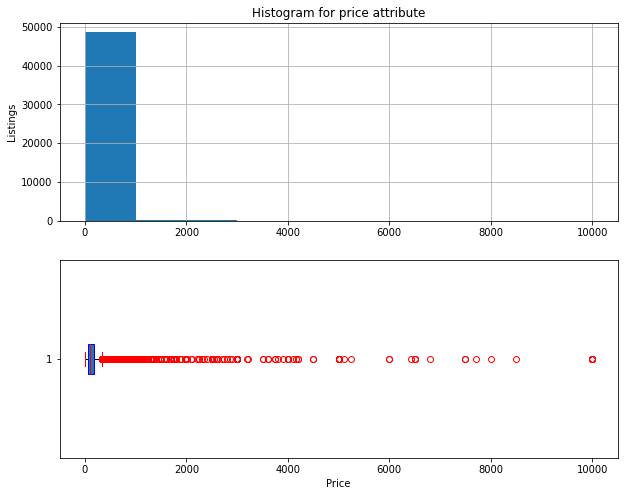

In [26]:
# Distribution of price
prices = airbnb["price"]
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(211)
plt.grid()
plt.title('Histogram for price attribute')
plt.ylabel('Listings')
hist_price = ax1.hist(prices)
ax2 = fig.add_subplot(212)
box_price = ax2.boxplot(prices, vert=False,patch_artist=True, boxprops=dict(color='blue'),capprops=dict(color='red'),medianprops=dict(color='red'),flierprops=dict(markeredgecolor='red'))
plt.xlabel('Price')
print('The 3rd order moment for the distribution (Skewness Index) for the prices data is approximately: {:.2f}'.format(prices.skew()))

From the previous histogram we can see that most listings have price **less than 1000** and, anyway, almost all **less than 2000 $**. Moreover, the **Skewness Index is high (Skewness = 19.11)**; since it represents how our data are far from the simmetric position (Skewness = 0) and is an indicator of possible outliers in the distribution, such a value made me think about a more accurate analysis of values higher than the thresholds previuosly found. 

Let's explore this fact in a deeper way by looking at the distribution of the values for listings with prices less than these threshold.

Text(0.5, 0, 'Price')

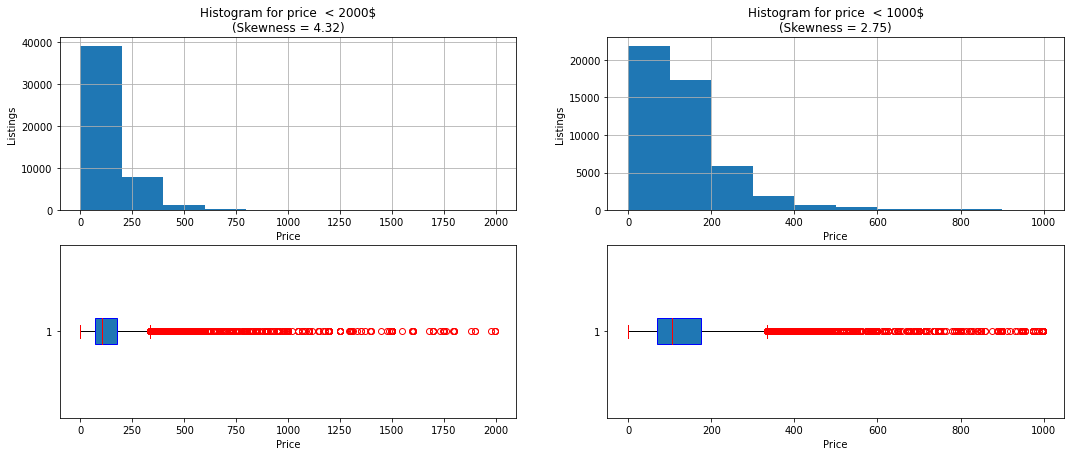

In [27]:
# Distribution of price less than 1000 and 2000 $
prices_less1000 = airbnb["price"][airbnb["price"]<1000]
prices_less2000 = airbnb["price"][airbnb["price"]<2000]
fig = plt.figure(figsize=(18, 7))
# histogram less than 2000
ax1 = fig.add_subplot(221)
plt.grid()
plt.title('Histogram for price  < 2000$\n(Skewness = {:.2f})'.format(prices_less2000.skew()))
plt.xlabel('Price')
plt.ylabel('Listings')
hist_less2000 = ax1.hist(prices_less2000)
# histogram less than 1000
ax2 = fig.add_subplot(222)
plt.grid()
plt.title('Histogram for price  < 1000$\n(Skewness = {:.2f})'.format(prices_less1000.skew()))
plt.xlabel('Price')
plt.ylabel('Listings')
hist_less1000 = ax2.hist(prices_less1000)
# boxplot less than 2000
ax3 = fig.add_subplot(223)
box_less2000 = ax3.boxplot(prices_less2000, vert=False,patch_artist=True, boxprops=dict(color='blue'),capprops=dict(color='red'),medianprops=dict(color='red'),flierprops=dict(markeredgecolor='red'))
plt.xlabel('Price')
# boxplot less than 1000
ax4 = fig.add_subplot(224)
box_less1000 = ax4.boxplot(prices_less1000, vert=False,patch_artist=True, boxprops=dict(color='blue'),capprops=dict(color='red'),medianprops=dict(color='red'),flierprops=dict(markeredgecolor='red'))
plt.xlabel('Price')

It seems interesting that reducing the threshold value, the Skewness index tends to the simmetric value. Exploiting this fact, I could find a threshold value which brings to a **3rd order moment close to zero** and consider each value greater than it as an outliers to be removed (pay attention to the number of outliers effectively removed), for a greater accuracy on predicting the price. Let's try **600$**, first.

The number of outliers is 859 out of 48874 (total rows of the dataframe)


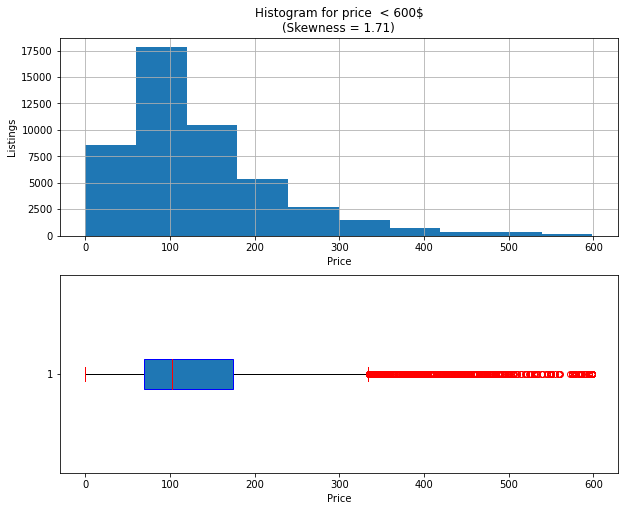

In [28]:
# Distribution of price less than 600 $
prices_less600 = airbnb["price"][airbnb["price"]<600]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(211)
plt.grid()
plt.title('Histogram for price  < 600$\n(Skewness = {:.2f})'.format(prices_less600.skew()))
plt.xlabel('Price')
plt.ylabel('Listings')
hist_less600 = ax.hist(prices_less600)
ax2 = fig.add_subplot(212)
box_less600 = ax2.boxplot(prices_less600, vert=False,patch_artist=True, boxprops=dict(color='blue'),capprops=dict(color='red'),medianprops=dict(color='red'),flierprops=dict(markeredgecolor='red'))
plt.xlabel('Price')
print('The number of outliers is {} out of {} (total rows of the dataframe)'.format(prices.shape[0]-prices_less600.shape[0],prices.shape[0]))

We can do even better.

The number of outliers is 6225 out of 48874 (total rows of the dataframe)


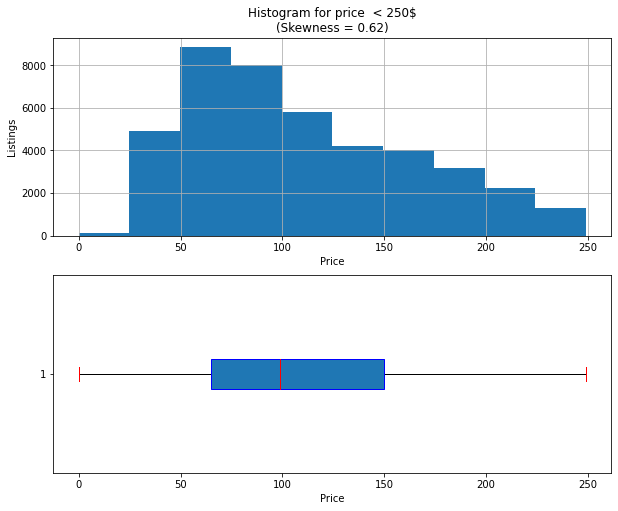

In [29]:
# Distribution of price less than 250 $
prices_less250 = airbnb["price"][airbnb["price"]<250]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(211)
plt.grid()
plt.title('Histogram for price  < 250$\n(Skewness = {:.2f})'.format(prices_less250.skew()))
plt.xlabel('Price')
plt.ylabel('Listings')
hist_less250 = ax.hist(prices_less250)
ax2 = fig.add_subplot(212)
box_less250 = ax2.boxplot(prices_less250, vert=False,patch_artist=True, boxprops=dict(color='blue'),capprops=dict(color='red'),medianprops=dict(color='red'),flierprops=dict(markeredgecolor='red'))
plt.xlabel('Price')
print('The number of outliers is {} out of {} (total rows of the dataframe)'.format(prices.shape[0]-prices_less250.shape[0],prices.shape[0]))

Ok, let's take **250 $** as a threshold for further operation, since it shows good results in terms of **Skewness** index (**0.62**) and possible **outliers** (**6223** out of 48858). Moreover, it is reasonable that people don't spend too much for a single day; the fact that the some listing shows a too much high price could be due to mistakes in setting the price from the host during the subscribe phase or that they refer to extremely luxurious. Hence, I changed the original dataset according to this information.

In [30]:
# Removing outliers and showing results (head and tail)
airbnb = airbnb[airbnb["price"]<250]
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NOreview,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NOreview,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NOreview,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NOreview,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NOreview,0.00,6,2


Let's see again some useful summary statistics for the price attribute without outliers.

In [31]:
# Summary statistics for price target attribute without outliers
airbnb["price"].describe()

count    42649.000000
mean       107.901334
std         53.803431
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

The same analysis can be done also for possible strange very low values. For instance, the **minimum value** is exactly **0 dollars** and I do not expect for a generous host. I checked for how many values are less than 10 $ (in a consistent way with respect to the last histogram realized) with the cell below:

The number of strange values is 129 out of 42649 (total rows of the dataframe)


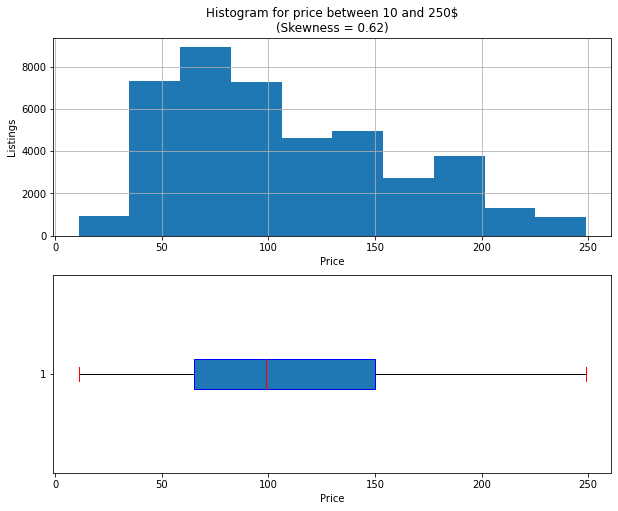

In [32]:
# Distribution of price less than 250 $ and greater than 10
prices_10_to250 = airbnb["price"][airbnb["price"]>10]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(211)
plt.grid()
plt.title('Histogram for price between 10 and 250$\n(Skewness = {:.2f})'.format(prices_10_to250.skew()))
plt.xlabel('Price')
plt.ylabel('Listings')
hist_10_to250 = ax.hist(prices_10_to250)
ax2 = fig.add_subplot(212)
box_10_to250 = ax2.boxplot(prices_10_to250, vert=False,patch_artist=True, boxprops=dict(color='blue'),capprops=dict(color='red'),medianprops=dict(color='red'),flierprops=dict(markeredgecolor='red'))
plt.xlabel('Price')
print('The number of strange values is {} out of {} (total rows of the dataframe)'.format(airbnb[airbnb["price"]<25].shape[0],airbnb['price'].shape[0]))

This fact brings to a little improvement in the distribution of the data, with the Skewness index that decreases a little bit. Hence, I changed again the *airbnb* dataset according to this information.

In [33]:
# Removing outliers and showing results (head and tail)
airbnb = airbnb[airbnb["price"]>10]
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NOreview,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NOreview,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NOreview,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NOreview,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NOreview,0.00,6,2


In [34]:
# Summary statistics for price target attribute after all the changes
airbnb["price"].describe()

count    42621.000000
mean       107.968232
std         53.757590
min         11.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

Now, the statistics for the data seem to be consistent with the real problem situation, having prices which vary in the **range: from 11 up to 249 dollars**. The **average price** is now **107.97 $**.

## 3.2 - Useful summary statistics for other variables

I will try to make some considerations about some of the other variables as well.

#### 3.2.1 - Statistics for minimum_nights attribute

In [35]:
# Summary statistics for minimum_nights attribute
airbnb["minimum_nights"].describe()

count    42621.000000
mean         6.858755
std         19.991301
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

The maximum value seems to be quite strange, since it refers to *minimum_nights* stays equal to 3 years and half at least. Moreover, it is very far from the upper quartile of the distribution, which means there are few very high values, that we can actually consider as outliers. Let's try to understand it in a deeeper way.

In [36]:
uQuan_minNights = np.quantile(airbnb['minimum_nights'],0.989)
print('The upper 98.9% quantile is :',int(uQuan_minNights))

The upper 98.9% quantile is : 31


This means that the **98.9% of the data** is described by the only listing with a **minimum_nights** stay **less than 31 days** (a month). Let's store this result into our **airbnb** dataframe.

In [37]:
airbnb = airbnb[airbnb['minimum_nights']<=uQuan_minNights]
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NOreview,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### 3.2.2 - Statistics for number_of_reviews and reviews_per_month attributes

In [38]:
# Summary statistics for reviews_per_month attribute
airbnb["reviews_per_month"].describe()

count    42157.000000
mean         1.128404
std          1.628720
min          0.000000
25%          0.050000
50%          0.410000
75%          1.660000
max         58.500000
Name: reviews_per_month, dtype: float64

This seems to be interesting, since some listing shows 58.5 *reviews_per_month* (which is not reasonable since, considering the limit case of a whole-month-busy listing, the maximum threshold must be set up to 31 *reviews_per_month*). Let's investigate values greater than 31.

In [39]:
# Values greater than the threshold for reviews_per_month
airbnb[airbnb["reviews_per_month"]>31]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


Actually, there is only one value which is greater than the threshold, hence we can easily drop it in the **airbnb** dataframe.

In [40]:
# Removing outlier value for reviews_per_month
airbnb = airbnb[airbnb["reviews_per_month"]<31]

Let's proceed with **number_of_reviews**.

In [41]:
# Summary statistics for number_of_reviews attribute
airbnb["number_of_reviews"].describe()

count    42156.000000
mean        24.570239
std         46.080624
min          0.000000
25%          1.000000
50%          6.000000
75%         25.000000
max        629.000000
Name: number_of_reviews, dtype: float64

As previously noticed, the maximum value seems to be quite strange. Moreover, it is very far from the upper quartile of the distribution, which means there are few very high values, that we can actually consider as outliers. Let's try to understand it in a deeeper way.

In [42]:
uQuan_numRev = np.quantile(airbnb['number_of_reviews'],0.95)
print('The upper 95% quantile is :',int(uQuan_numRev))

The upper 95% quantile is : 119


This means that the **95% of the data** is described by the only listings with a **number_of_reviews less than 119**. Let's store this result into our **airbnb** dataframe.

In [43]:
airbnb = airbnb[airbnb['number_of_reviews']<=uQuan_numRev]

#### 3.2.3 - Statistics for availability_365 attribute

In [44]:
airbnb["availability_365"].describe()

count    40071.000000
mean       103.311597
std        129.218739
min          0.000000
25%          0.000000
50%         30.000000
75%        190.000000
max        365.000000
Name: availability_365, dtype: float64

This seems quite strange for minimum value. What's the reason for having a listing in Airbnb if you don't make it available during the year? This is beacause Airbnb allows you to set your listing as unavailable and not take it down completely. This results in listings that are temporarily unavailable due to host preferences or they were set in such a way when data was collected. Hence we cannot treat them as outliers or bad values.

#### 3.2.4 - Statistics for latitude and longitude attributes

In [45]:
airbnb["latitude"].describe()

count    40071.000000
mean        40.727964
std          0.056341
min         40.499790
25%         40.688530
50%         40.720280
75%         40.763710
max         40.913060
Name: latitude, dtype: float64

The **"latitude"** (abbreviation: Lat., **φ**, or phi) of a point on Earth's surface is the angle between the equatorial plane and the straight line that passes through that point and through (or close to) the center of the Earth. Hence, the latitude is a meausere of how a point (each listing in this case) is spread toward the Northern or Southern hemisphere of the globe.

In [46]:
airbnb["longitude"].describe()

count    40071.000000
mean       -73.949069
std          0.046745
min        -74.244420
25%        -73.979980
50%        -73.953030
75%        -73.931840
max        -73.712990
Name: longitude, dtype: float64

The **"longitude"** (abbreviation: Long., **λ**, or lambda) of a point on Earth's surface is the angle east or west of a reference meridian to another meridian that passes through that point. All meridians are halves of great ellipses (often called great circles), which converge at the North and South Poles. The meridian of the British Royal Observatory in Greenwich, in southeast London, England, is the international prime meridian. Hence, the longitude is a meausere of how a point (each listing in this case) is spread toward the Eastern or Western hemisphere of the globe.


This seems to be interesting; the difference between the maximum and the minimum value in a Decimal Degree scale is greater for *longitude* over *latitude*, making me to think about an higher spread of the listings in horizontal manner with respect to a vertical one.

## 3.3 - Useful statistics between target and other variables

In this section, we will explore the **correlation** between all the numerical attributes with respect to the label, which is **price**.

Let's recall what we mean with $correlation$: it is a statistical measure which represents the degree of association between two variables or whether there is a relationship between them (but not necessarily a relationship of causality). With the correlation we do not expect that between the two variables X and Y there is a causal relationship (e.g. two variables could be related due to the fact that both are dependent on a third variable, or simply the correlation could be an effect of chance).

In [47]:
# Correlation between price and other numerical values
airbnb.corr()['price']

id                               -0.055691
host_id                          -0.070729
latitude                          0.068991
longitude                        -0.306601
price                             1.000000
minimum_nights                    0.065393
number_of_reviews                -0.012690
reviews_per_month                -0.044829
calculated_host_listings_count    0.168848
availability_365                  0.039942
Name: price, dtype: float64

From the results above, we can conclude that the **target** variable is not so correlated with the others, except for **longitude** feature above average. 

Let's visualize some useful graphical representation.

In [48]:
# Creating a dataframe with median values for each borough depending on the room_type 
# I considered median since mean highly depend on outliers values
med_roomtype_borough = airbnb.groupby(['neighbourhood_group', 'room_type']).median()[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month']]
med_roomtype_borough

price  ...  reviews_per_month
neighbourhood_group room_type               ...                   
Bronx               Entire home/apt  100.0  ...              1.240
                    Private room      54.0  ...              0.730
                    Shared room       40.0  ...              0.525
Brooklyn            Entire home/apt  130.0  ...              0.400
                    Private room      63.0  ...              0.290
                    Shared room       35.0  ...              0.250
Manhattan           Entire home/apt  160.0  ...              0.230
                    Private room      87.0  ...              0.330
                    Shared room       68.0  ...              0.580
Queens              Entire home/apt  115.0  ...              0.780
                    Private room      60.0  ...              0.640
                    Shared room       37.0  ...              0.640
Staten Island       Entire home/apt  100.0  ...              1.470
                    Private room      52.0  ...              0.930
                    Shared room       30.0  ...              0.060

[15 rows x 4 columns]

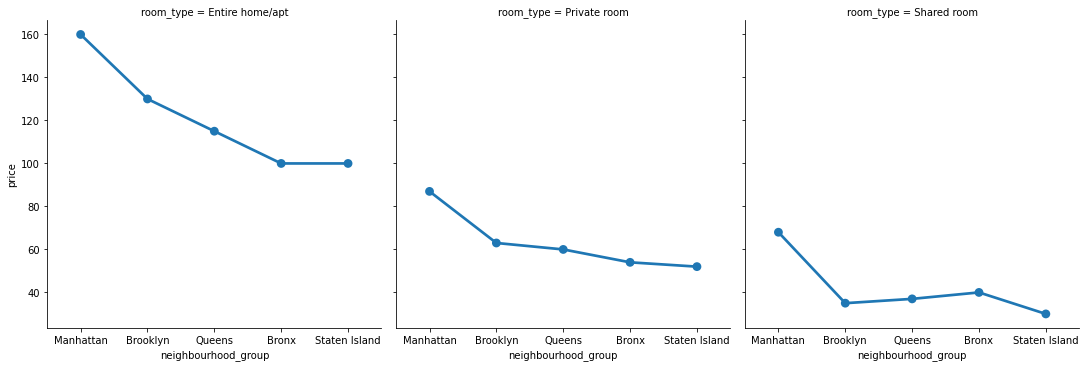

In [49]:
# Avg prices per borough for each room type
top_price = med_roomtype_borough.sort_values(by = 'price', ascending = False).reset_index()
top_price_plot = sns.catplot(x = 'neighbourhood_group', y = 'price', data = top_price, ci = False, estimator = np.median, kind = 'point', col = 'room_type')

As we can see, Manhattan has the most expensive listing offers for all the room types, while Staten Island has the cheapest ones. This further reinforces the previous observations we made as to why Staten Island hosts can be considered as the busiest ones.

## 3.4 - Useful statistics between all numerical features

In this section, we will explore the **correlation** between all the numerical attributes with respect each other.

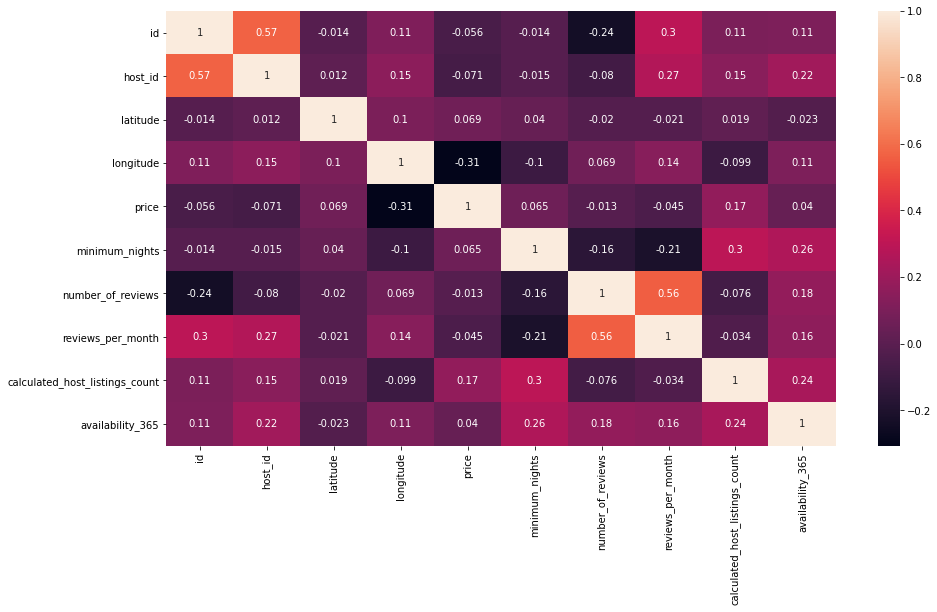

In [50]:
# Plotting a correlation matrix for numerical variables 
corrMatrix = airbnb.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrMatrix, annot=True)

From this observation, we can conclude that most of the numerical features do not really have strong correlations with each other directly, apart from `reviews_per_month` with `number_of_reviews` (which is reasonable) and `host_id` with `id` (this indicates that most of the host posted a listing were new in the platform, since the *host_id* tends to increase when the *id* does itself).

Givent these results, we cannot say that there is too much **multicollinearity** between the indipendent variables that can bring to bad results in predicting the price. 
However, in understanding if the removal of some of the "high" correlated variables could bring interesting benefits to our model, I had to think about the shape of the dataset; in fact, since the number of predictors is very low, I decided to drop only **id** variable, trying to mitigate the **underfitting** we will face up with, given the nature of the problem (in predicting price, has no sense keeping it).

---

# 4. Model development

In this section, we will start building our ML model with different approaches. First of all, let's create a dataframe useful for the model, without considering *not useful features*.

In [51]:
# Creating a dataframe, dropping some column in the airbnb dataset
model_attributes = airbnb.drop(columns = ['id', 'host_name', 'name','last_review'], axis = 1).copy(deep=True)
print(model_attributes.shape)
model_attributes.head()

(40071, 12)


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


Let's now **encode categorical variables** thanks to a **one hot encoding approach**.

In [52]:
# Onehot encoding
model_onehot = pd.get_dummies(model_attributes,columns=['neighbourhood_group','neighbourhood','room_type'], prefix = ['boro','neig','room'])
print(model_onehot.shape)
model_onehot.head()

(40071, 236)


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens,boro_Staten Island,neig_Allerton,neig_Arden Heights,neig_Arrochar,neig_Arverne,neig_Astoria,neig_Bath Beach,neig_Battery Park City,neig_Bay Ridge,neig_Bay Terrace,"neig_Bay Terrace, Staten Island",neig_Baychester,neig_Bayside,neig_Bayswater,neig_Bedford-Stuyvesant,neig_Belle Harbor,neig_Bellerose,neig_Belmont,neig_Bensonhurst,neig_Bergen Beach,neig_Boerum Hill,neig_Borough Park,neig_Breezy Point,neig_Briarwood,neig_Brighton Beach,neig_Bronxdale,neig_Brooklyn Heights,...,neig_Springfield Gardens,neig_Spuyten Duyvil,neig_St. Albans,neig_St. George,neig_Stapleton,neig_Stuyvesant Town,neig_Sunnyside,neig_Sunset Park,neig_Theater District,neig_Throgs Neck,neig_Todt Hill,neig_Tompkinsville,neig_Tottenville,neig_Tremont,neig_Tribeca,neig_Two Bridges,neig_Unionport,neig_University Heights,neig_Upper East Side,neig_Upper West Side,neig_Van Nest,neig_Vinegar Hill,neig_Wakefield,neig_Washington Heights,neig_West Brighton,neig_West Farms,neig_West Village,neig_Westchester Square,neig_Westerleigh,neig_Whitestone,neig_Williamsbridge,neig_Williamsburg,neig_Willowbrook,neig_Windsor Terrace,neig_Woodhaven,neig_Woodlawn,neig_Woodside,room_Entire home/apt,room_Private room,room_Shared room
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,7322,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
# Creating a dataframe for predictors (X) and labels (y)
X = model_onehot.drop(columns = ['price'], axis = 1)
y = model_onehot['price']

Now, I will create a function which gives as output the **best splitting into train and test set** thanks to a **K-Fold Cross_validation** (exploring the best result in terms of accuracy of the model fitting).

Let's recall what we mean with $R^2$. It is a statistical score representing the proportion of the variance in the dependent variable that is predictable from the independent variables.
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

In [54]:
# K-Fold function
def KfoldCV(X, y, nsplits=5):
    '''This function is aimed to find the best (in an herustic sense) division between training and test sets 
    with a K-Fold CV'''
    kf = KFold(n_splits=nsplits, shuffle=True)
    fold_n = 1 # pointer for the number of the fold
    lrm = LinearRegression() # estimator for LR
    # initialization of some lists
    r2_scores_test = []
    train = []
    test = []
    print("\n### {}-Folds Cross-Validation\n".format(kf.get_n_splits(X)))
    for train_ids, test_ids in kf.split(X):
        fold_n += 1
        # Splitting data
        X_train, X_test = np.array(X)[train_ids], np.array(X)[test_ids]
        y_train, y_test = np.array(y)[train_ids], np.array(y)[test_ids] 
        # Fitting the model
        lrm.fit(X_train, y_train)
        # Storing the model
        train.append(train_ids)
        test.append(test_ids)
        r2_scores_test.append(lrm.score(X_test, y_test)) #r2 for test
    avg_r2_test = sum(r2_scores_test) / kf.get_n_splits(X)
    r2_best_test = max(r2_scores_test)
    train_best = train[r2_scores_test.index(r2_best_test)]
    test_best = test[r2_scores_test.index(r2_best_test)]
    print('Done!')
    return(avg_r2_test, r2_best_test, train_best, test_best)

In [55]:
# Let's store the best result in terms of average performance, best R^2 and best training/test sets
avg_r2_test, r2_best_test, train_best, test_best = KfoldCV(X,y)


### 5-Folds Cross-Validation

Done!


In [56]:
# Splitting into train and test set according to the K-fold CV
X_train,X_test = np.array(X)[train_best], np.array(X)[test_best]
y_train,y_test = np.array(y)[train_best], np.array(y)[test_best]
lrm = LinearRegression() # estimator for LinearR
alpha = .01
lasso = Lasso(alpha=alpha, normalize=True) # estimator for LassoR
ridge = Ridge(alpha=alpha, normalize=True) # estimator for RidgeR
elasticnet = ElasticNet(alpha=alpha, l1_ratio=.5, normalize=True)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32057, 235)
(8014, 235)
(32057,)
(8014,)


In [58]:
# GridSearchCV for finding the best hyperparameters for Elastic-Net regression
elasticnet = ElasticNet()
parameters = {
    'alpha': np.linspace(.1, 100., 5), 
    'l1_ratio': np.linspace(.1, 1., 5)
    }
gs = GridSearchCV(elasticnet, parameters, cv=5)
gs.fit(X_train, y_train)
elasticnet = gs.best_estimator_
#gs.best_estimator_

In [59]:
# Comparing models in terms of R^2
r2_test_list=[]
print("Results for linear, lasso, ridge and elastic-net (in this order):")
for model in (lrm, lasso, ridge, elasticnet):
    model.fit(X_train, y_train) # fitting the model
    r2_test = model.score(X_test, y_test) # evaluating the model
    r2_test_list.append(r2_test)
    print("The r^2 score for the TEST set is: {}".format(r2_test))

Results for linear, lasso, ridge and elastic-net (in this order):
The r^2 score for the TEST set is: 0.5719311860853438
The r^2 score for the TEST set is: 0.5293322648148387
The r^2 score for the TEST set is: 0.5714547345016063
The r^2 score for the TEST set is: 0.551555065993566


---

# 5. Results and conclusion

It's time for some results, possible future developments and observations.

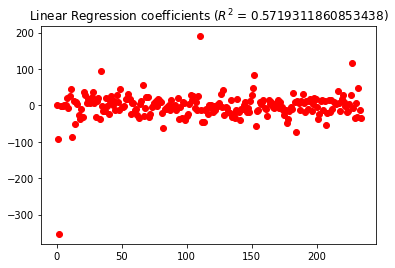

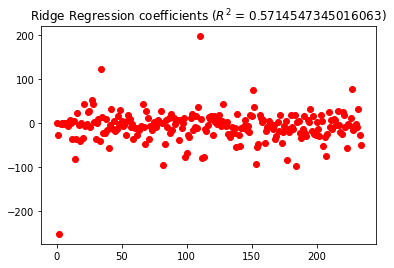

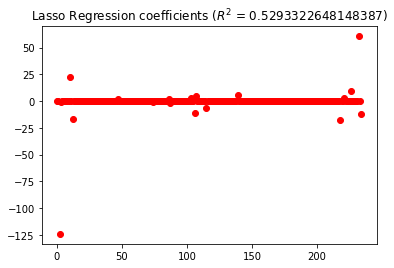

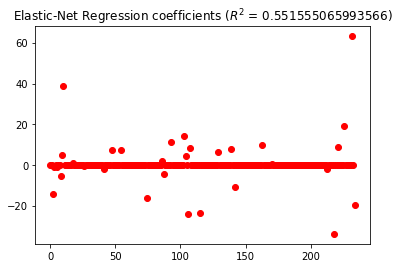

In [60]:
# Print the parameters (beta) of each model
linearCoeff = lrm.coef_
plt.figure()
plt.plot(range(len(linearCoeff)), linearCoeff, 'ro')
plt.title('Linear Regression coefficients ($R^2$ = {})'.format(r2_test_list[0]))

ridgeCoeff = ridge.coef_
plt.figure()
plt.plot(range(len(ridgeCoeff)), ridgeCoeff, 'ro')
plt.title('Ridge Regression coefficients ($R^2$ = {})'.format(r2_test_list[2]))

lassoCoeff = lasso.coef_
plt.figure()
plt.plot(range(len(lassoCoeff)), lassoCoeff, 'ro')
plt.title('Lasso Regression coefficients ($R^2$ = {})'.format(r2_test_list[1]))

elasCoeff = elasticnet.coef_
plt.figure()
plt.plot(range(len(elasCoeff)), elasCoeff, 'ro')
plt.title('Elastic-Net Regression coefficients ($R^2$ = {})'.format(r2_test_list[3]))

plt.show()

From the previous representation, is possible to see that the **Linear Multiple Regression** is the model which performs better. In fact, using every kind of normalization with the other models (higher regularization for **Lasso Regression**, lower for **Ridge Regression** and in a mid-range for **Elastic-Net Regression**) brings to less accurate measures in terms of $R^2$. Another useful observation is that I got just a little bit better performances in *Linear* with respect to *Ridge Regression*, due to the values of the hyperparameter $alpha$ which is very close to zero ($alpha = 0.01$).
Indeed, higher the regularization, lower the accuracy. This is probably due to an **underfitting** problem in how our model fits the data and is confirmed by the fact that:
- we have a **low number of predictors** (all the attributes but the target)
- since regularization with Lasso Regression involves also **feature selection**, having some **Lasso coefficients = 0** brings to even worst results in terms of performances.



Possible **future developments**, in order to get a better performances in predicting the price of each listing, can be:
1. Performing a **Feature Engineering** phase, trying to create additional features to be used as useful predictors in the development of the models
2. Trying other different **regression** models (**polynomial regression** above all).

Before finishing, let's try to give an answer to the following questions: **What are the most informative features in predicting the price?**.
To answer this questions we can consider two different cases:
- **Linear Regression Coefficients**
- **Lasso Regression Coefficients**

In [61]:
# Informative features according to Linear Regression
for i in np.abs(lrm.coef_).argsort()[-5:]:
    print(X.iloc[:,i].name) 

latitude
neig_Breezy Point
neig_Willowbrook
neig_Holliswood
longitude


In [62]:
# Informative features according to Lasso Regression
for i in np.abs(lasso.coef_).argsort()[-5:]:
    print(X.iloc[:,i].name) 

boro_Staten Island
neig_Washington Heights
boro_Manhattan
room_Entire home/apt
longitude


From the coefficients of the Linear and Lasso Regression we can say that the most informative features according to both the models are the ones **connected to the location identification** and in particular:
- the Linear Regression among all the features used in the model shows that **longitude** and **latitude** attribute are in the top 5
- the Lasso Regression seems to discard the **latitude**, but considers the most informative feature the **longitude** as well
- the Lasso Regression gives an high importance to the **room_type** while the Linear one does not.

Hence I can say that, as already partially noticed in the **Exploratory Data Analysis**, the location spread among Eastern and Western listings in NYC has an higher influence than the North/South listings division in predicting the price. This is confirmed by the fact that NYC's area mainly extends in an *horizontal* manner.